In [119]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/kallus/Applications/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Logistic regression

In [120]:
from sklearn import linear_model, datasets
import pandas
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2] ## bmi
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [121]:
pandas.DataFrame(diabetes.data, columns=diabetes.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [122]:
med = np.median(diabetes.target)
diabetes_yc_train = diabetes.target[:-20]>med
diabetes_yc_test = diabetes.target[-20:]>med

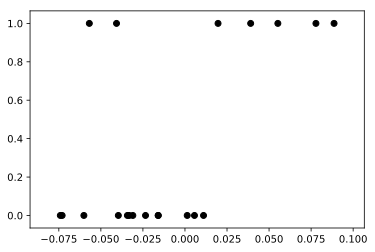

In [123]:
plt.scatter(diabetes_X_test, diabetes_yc_test,  color='black')

In [124]:
lr = linear_model.LogisticRegression()
lr.fit(diabetes_X_train, diabetes_yc_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [125]:
print 'model: logit(p(yc=1|x)) = %f + %f * BMI' % (lr.intercept_, lr.coef_)


model: logit(p(yc=1|x)) = 0.026917 + 3.685196 * BMI


In [126]:
from sklearn import metrics
cf=metrics.confusion_matrix(diabetes_yc_test, lr.predict(diabetes_X_test))
pandas.DataFrame(cf,('true %i'%x for x in range(2)),('pred %i'%x for x in range(2)))


,pred 0,pred 1
true 0,10,3
true 1,2,5


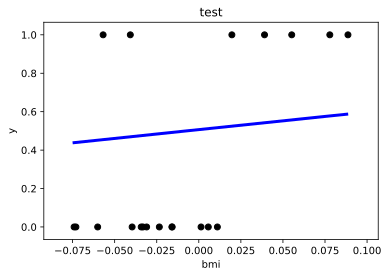

In [127]:
plt.scatter(diabetes_X_test, diabetes_yc_test,  color='black')
xs = np.arange(min(diabetes_X_test)[0],max(diabetes_X_test)[0],.001).reshape(-1,1)
plt.plot(xs, lr.predict_proba(xs)[:,1], color='blue', linewidth=3)

plt.xlabel('bmi')
plt.ylabel('y')
plt.title('test')
plt.show()


Bias-variance tradeoff

In [ ]:
f = lambda x: x*np.sin(x)

In [ ]:
xtest = np.arange(-5,5,.01).reshape(-1,1)

In [ ]:
n = 20
d = 7
xtrain = np.random.rand(n).reshape(-1,1)*10-5
ytrain = f(xtrain).reshape(-1) + np.random.randn(n)
ypred  = linear_model.LinearRegression().fit(
    np.hstack((xtrain**i for i in range(1,d+1))), ytrain
).predict(np.hstack((xtest**i for i in range(1,d+1))))
ytest  = f(xtest).reshape(-1)
plot(xtest,ytest,'r-')
plot(xtest,ypred,'b--')
ylim(-8,4)

In [ ]:
n = 10
ds = range(1,10)
errors = {d: [] for d in ds}
for i in range(10000):
    xtrain = np.random.rand(n).reshape(-1,1)*10-5
    ytrain = f(xtrain).reshape(-1) + np.random.randn(n)
    ytest  = f(xtest).reshape(-1)
    for d in ds:
        ypred  = linear_model.LinearRegression().fit(
            np.hstack((xtrain**i for i in range(1,d+1))), ytrain
        ).predict(np.hstack((xtest**i for i in range(1,d+1))))
        errors[d].append(ytest-ypred)

In [ ]:
bias2 = np.array([errors[d] for d in ds]).mean(-1).mean(-1)**2
var   = np.array([errors[d] for d in ds]).var(-2).mean(-1)

In [ ]:
plot(ds, bias2, 'b')
plot(ds, var, 'r')
xscale('log')
yscale('log')